In [1]:
import pandas as pd
import numpy as np

In [2]:
## 결측치 확인
s1 = pd.Series([1, np.nan, 3,4,5])
s2 = pd.Series([1,2,np.nan,4,5])
s3 = pd.Series([1,2,3,np.nan,5])
df = pd.DataFrame({'s1':s1,
                's2':s2,
                's3':s3})
df

,s1,s2,s3
0,1.0,1.0,1.0
1,NaN,2.0,2.0
2,3.0,NaN,3.0
3,4.0,4.0,NaN
4,5.0,5.0,5.0


In [4]:
## 결측치를 확인하는 함수 -> isna() 
df.isna()
df['s1'].isna()

0    False
1     True
2    False
3    False
4    False
Name: s1, dtype: bool

In [5]:
## 결측치의 개수 -> isna().sum()
## True -> 1 , False -> 0 
## sum()함수를 이용해서 결측치의 개수를 확인 가능
df.isna().sum()

s1    1
s2    1
s3    1
dtype: int64

In [6]:
## 결측치를 삭제하는 함수 -> dropna()
## axis 속성을 이용하여 축을 지정 -> 0 : 행을 삭제, 1: 열을 삭제
df.dropna(axis=0)

,s1,s2,s3
0,1.0,1.0,1.0
4,5.0,5.0,5.0


In [7]:
# 결측치가 존재하는 열을 삭제
df.dropna(axis=1)

""
0
1
2
3
4


In [12]:
sales_records = pd.read_csv("../csv/Sales Records.csv")
sales_records.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.5


In [9]:
## 결측치가 존재하는지 확인
sales_records.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [11]:
## 통계 요약 정보 출력
sales_records["Total Cost"].describe()

count    1.000000e+04
mean     9.382658e+05
std      1.145914e+06
min      1.245600e+02
25%      1.647855e+05
50%      4.816058e+05
75%      1.183822e+06
max      5.241726e+06
Name: Total Cost, dtype: float64

In [14]:
## Order Date / Ship Date 컬럼의 데이터를 시계열 변경
sales_records["Order Date"] = pd.to_datetime(sales_records["Order Date"], format = "%m/%d/%Y")
sales_records.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.5


In [17]:
## 컬럼의 이름만 출력
sales_records.columns = ["대륙", "국가", "상품타입", "판매채널", "우선순위", "주문날짜", 
                        "주문ID", "발송일자", "판매단위", "단가", "원가", "총수익", 
                        "총비용", "총이윤"]
sales_records.head(2)

,대륙,국가,상품타입,판매채널,우선순위,주문날짜,주문ID,발송일자,판매단위,단가,원가,총수익,총비용,총이윤
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.5


In [ ]:
## 데이터에서 소수점자리를 변경하면서 반올림을 해주는 함수 -> 
## round(n) : n의 자리수만큼 유지 나머지 값은 반올림
sales_records["총비용"].round(1)

In [ ]:
## 데이터의 타입을 변경 시키는 함수 -> 총이윤 컬럼의 데이터의 형태를 float int 형태로 변경
## astype(int)-> 타입을 int의 형태로 변경
sales_records["총이윤"].astype(int)

In [ ]:
## round(0), astype(int) 차이? -> 데이터형태 round(0): float, astype(int): int
## 수치에서도 차이 있다. -> round() : 반올림 , astype(int) : 소수점자리 수치를 버림.
## round(0).astype(int)를 동시에 사용.
sales_records["총이윤"].round(0).astype(int)

In [23]:
## 위의 3개의 작업은 연산을 해서 출력만 한 상태.
## 원본의 데이터의 수정작업 X
## 원본의 데이터를 수정을 하기위해서는 
## 원본의 어느 데이터에 연산이 된 값들을 넣어줄지 작성.


## 총비용 컬럼의 값들을 반올림해서 총비용 컬럼에 삽입
sales_records["총비용"] = sales_records["총비용"].round(1)
## 수정작업 후 데이터를 확인하는 코드를 작성(수정 작업후에는 데이터의 조회는 필수)
sales_records["총비용"].head(2)

0    2353920.6
1      34174.2
Name: 총비용, dtype: float64

In [24]:
## 컬럼의 데이터들을 그룹화하고 그 빈도의 수를 체크 함수
## value_counts() -> 컬럼의 데이터들을 조회를 해서 중복된 데이터의 개수를 출력

sales_records["국가"].value_counts()

United Kingdom    72
Lithuania         72
Moldova           71
Seychelles        70
Croatia           70
                  ..
Slovakia          42
Greenland         41
Tajikistan        40
Saint Lucia       39
Mali              35
Name: 국가, Length: 185, dtype: int64

In [26]:
## 그룹화 함수 -> groupby([그룹을 할 컬럼의 이름]).함수()  -> 그룹화를 한 데이터의 합, 평균, 표준편차....

sales_records.groupby(["국가", "상품타입"]).sum()["총이윤"]

국가           상품타입           
Afghanistan  Baby Food           131136.48
             Beverages           225190.80
             Cereal             4865097.03
             Clothes            2194901.28
             Cosmetics          2117214.99
                                   ...    
Zimbabwe     Meat                551408.00
             Office Supplies    2202683.75
             Personal Care       463058.68
             Snacks              899553.96
             Vegetables         2142947.85
Name: 총이윤, Length: 2198, dtype: float64

In [27]:
## 상대경로 (현재 작업중인 디렉토리에서 상위, 하위 이동을 해서 파일의 경로를 지정)
## ./ -> 현재 작업중인 디렉토리, 
## ../ -> 현재 작업중인 디렉토리에서 상위 디렉토리 이동
## ./디렉토리명/ -> 현재 작업중인 디렉토리에서 하위 디렉토리 이동
## ../../디렉토리명/ -> 현재 작업중인 디렉토리에서 상위, 상위 한번 더 이동 후 하위 디렉토리로 이동 
## ./디렉토리명/디렉토리명/ -> 현재 작업중인 디렉토리에서 하위 디렉토리 이동, 다시 하위 디렉토리 이동

corona = pd.read_csv("../csv/corona.csv")
corona.head(2)

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN


In [29]:
## 데이터를 삭제 
## drop() 속성(매개변수)의 값들은 2가지
## axis 축 설정 -> 행을 삭제, 열을 삭제
## inplace -> 기준이 되는 데이터프레임에 수정 유/무

corona.drop("Unnamed: 0", axis=1, inplace=True)
# corona = corona.drop("Unamed: 0", axis=1)
## 두 가지의 코드는 같은 작업.

KeyError: "['Unamed: 0'] not found in axis"

In [34]:
## 데이터프레임 정렬을 변경을 해주는 함수.
## sort_values(기준이되는 컬럼)
## 기본적으로는 오름차순 정렬. 
## 내림차순 정렬로 변경을 하려면 -> asceinding = False
## inplace 속성이 존재 -> 원본의 데이터를 수정할 수 있다. 

corona.sort_values("createDt", inplace=True)  ## 오름차순 정렬
# corona.sort_values("createDt", ascending=False) ## 내림차순 정렬

In [35]:
corona.head(2)

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
819,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175


In [38]:
## 인덱스를 초기화 하는 함수
## reset_index()
## 속성(매개변수) 값 : inplace, drop
## drop -> bool형태의 값 -> 기존의 인덱스를 삭제할지 여부

# corona.reset_index().drop("index", axis=1)
corona.reset_index(drop=True)
## 두가지 경우는 같은 작업.

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000
...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN


In [41]:
## 파생변수 생성.
## 파생변수를 생성하는 이유? -> 
## 기존의 데이터만이 아니라 연산이 된 데이터를 가지고 학습을 시키기 위해서(경우의 수 늘린다.)
## 데이터프레임명["추가할 컬럼의 이름"] = 연산식

corona["일일확진자"] = (corona["decideCnt"] - corona["decideCnt"].shift()).fillna(0)
# corona.head(2)
corona["일일사망자"] = (corona["deathCnt"].diff()).fillna(0)
corona.head(2)

## shift() -> column을 하나 내리는 함수
## shift(n) -> n개 만큼 column을 내린다. 

## fillna() -> ()의 값을 결측치에 채워준다.
## fillna -> method 속성(매개변수)
## method의 값 -> ffill: 전의 행의 값으로 채워준다. , bfill: 뒤의 행의 값으로 채워준다 
## diff() -> 값을 차이를 표시. 행과 행 , 열과 열의 차이를 출력

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자,일일사망자
819,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0
818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0


In [43]:
## apply() 함수 -> 연산 어떻게? -> 데이터프레임의 값들을 하나씩 체크해서 연산.
## 파생변수 H/L 생성을 해서 누적확진률이 평균의 값보다 크면 High 아니면 Low

## case1
corona["H/L"] = corona["accDefRate"].apply(lambda x : "High" if(x >= 3.5) else "Low")
corona.head(2)
## end case1

## case2
def HL(x):
    if (x > 3.5):
        return "High"
    else:
        return "Low"

corona["H/L_2"] = corona["accDefRate"].apply(HL)
corona
## end case2

## 두 코드 역시 같은 작업.



,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자,일일사망자,H/L,H/L_2
819,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High,High
818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,High
817,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,High
816,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,Low,Low
815,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,12039.0,9.0,Low,Low
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,9834.0,20.0,Low,Low
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,5022.0,21.0,Low,Low
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,6172.0,20.0,Low,Low


In [44]:
## createDt 컬럼의 시계열로 변환 
## 시계열 데이터를 확인해서 요일이라는 파생변수 생성

corona["createDt"] = pd.to_datetime(corona["createDt"])
corona.head(2)

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자,일일사망자,H/L,H/L_2
819,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High,High
818,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,High


In [45]:
## 시계열 데이터에서 요일을 추출하는 함수 .dt.weekday
## weekday 0:월, 1:화, ... 6:일
corona["요일"] = corona["createDt"].dt.weekday
corona.head(2)

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,일일확진자,일일사망자,H/L,H/L_2,요일
819,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High,High,1
818,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,High,2


In [50]:
corona_week = corona.groupby("요일").mean()

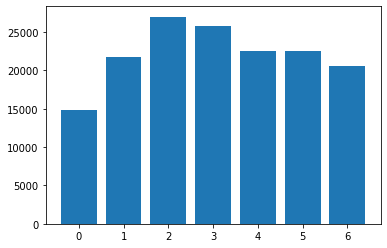

In [51]:
import matplotlib.pyplot as plt

y = corona_week["일일확진자"].tolist()
x = corona_week.index

plt.bar(x, y)
plt.show()

In [59]:
## 데이터프레임의 결합.
## 행을 추가할때 사용했던 함수 -> pandas내 있는 함수. concat()
## concat([데이터프레임명1, 데이터프레임2]) 
tran_1 = pd.read_csv("../csv/transaction_1.csv")
tran_2 = pd.read_csv("../csv/transaction_2.csv")
##단순하게 행을 추가(index값도 그대로 유지)
## index 0,1,2,3,0,1,2 인덱스의 상태

## case1
pd.concat([tran_1, tran_2]).reset_index(drop=True)


## reset_index() 사용하지 않아도 인덱스가 초기화를 시키는 방법
## concat() 함수에서 ??? 속성(매개변수) -> 
## ignore_index 속성에 값을 True 인덱스가 초기화 (기본값이 False)

## case2
pd.concat([tran_1, tran_2], ignore_index=True)

## case1, case2는 같은 작업

tran = pd.concat([tran_1, tran_2], ignore_index=True)

tran_d_1 = pd.read_csv("../csv/transaction_detail_1.csv")
tran_d_2 = pd.read_csv("../csv/transaction_detail_2.csv")

tran_d = pd.concat([tran_d_1, tran_d_2], ignore_index=True)
tran

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [58]:
## 열을 추가할때 사용했던 함수
## concat(axis=1)을 사용하면 행 추가가 가능하다. (단순하게 행을 추가)
## 특정 조건에 맞게 열을 추가하는 함수는?
## join 결합 : merge()
## merge(데이터프레임명1, 데이터프레임명2, on=?, how=?)
## on 속성에 어떠한 값을 넣어줘야되는가. -> 조건. 공통이 되는 컬럼이 이름
## how 속성 기준이 되는 데이터프레임이 어디인가 지정. sql수업하면서 join을 할때 진행
pd.merge(tran, tran_d, on="transaction_id", how="left")

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1
